<a href="https://colab.research.google.com/github/sanjaykumars24bai145-droid/credit-card-fraud-detection-/blob/main/credit_card_fraud_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✔ Dataset Loaded Successfully!
   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0   

✔ Found label column: 'IsFraud' → using it as 'label'
✔ Fraud label created successfully!

label
0    99000
1     1000
Name: count, dtype: int64 


✔ Model Training Completed! 🚀

============= MODEL PERFORMANCE =============
Accuracy  : 1.0
Precision : 1.0
Recall    : 1.0
ROC-AUC   : 1.0

Clas

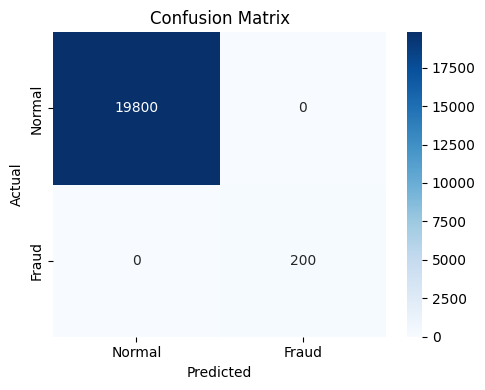

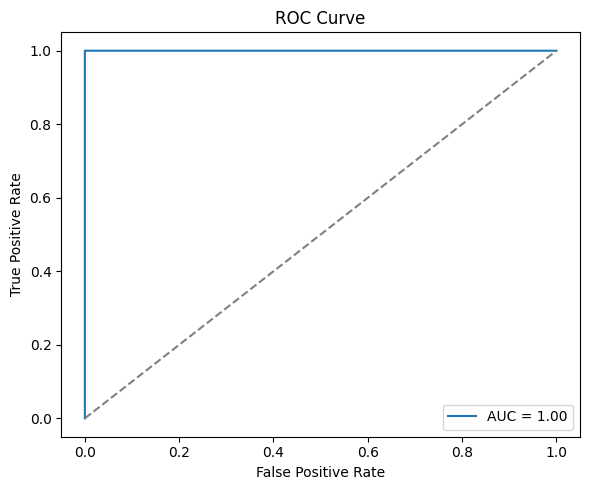

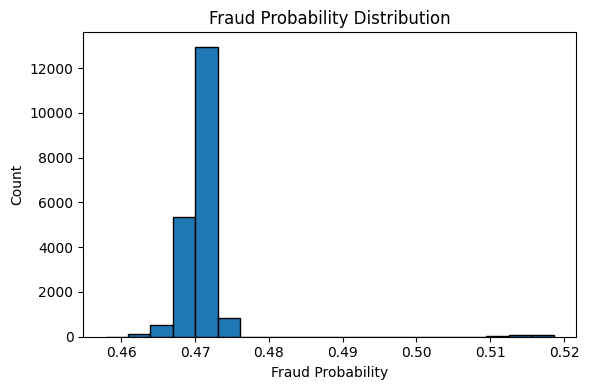

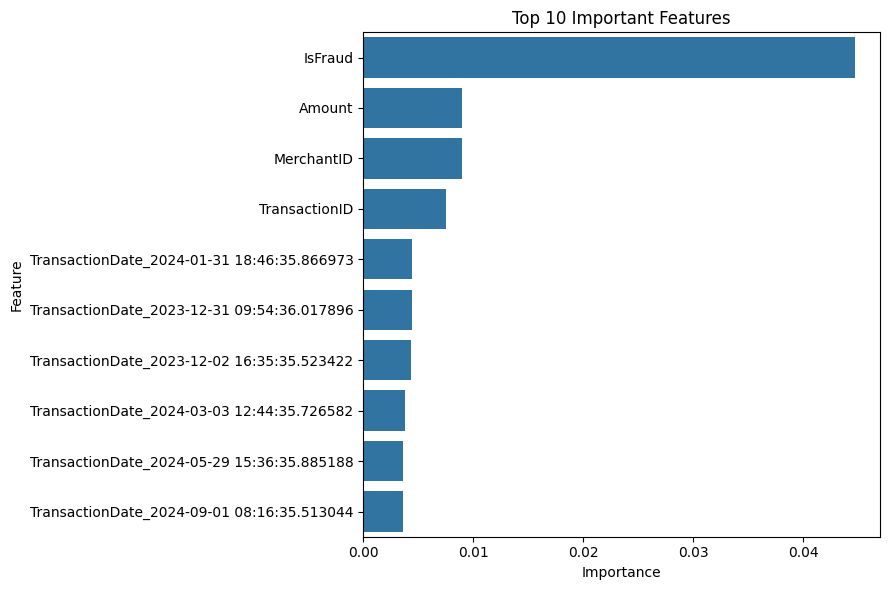


Top 10 Important Features:
                                          Feature  Importance
3                                         IsFraud    0.044767
1                                          Amount    0.009010
2                                      MerchantID    0.009001
0                                   TransactionID    0.007529
22253  TransactionDate_2024-01-31 18:46:35.866973    0.004473
15549  TransactionDate_2023-12-31 09:54:36.017896    0.004400
9147   TransactionDate_2023-12-02 16:35:35.523422    0.004354
29142  TransactionDate_2024-03-03 12:44:35.726582    0.003787
48323  TransactionDate_2024-05-29 15:36:35.885188    0.003620
68962  TransactionDate_2024-09-01 08:16:35.513044    0.003590

=== SAMPLE PREDICTION ===
Prediction : Normal
Probability: 0.4723


In [3]:
# =============================================================
#  CREDIT CARD FRAUD DETECTION (ONE FILE)
#  Algorithm: Random Forest Classifier
# =============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc,
    classification_report
)

# =============================================================
# 1. LOAD DATASET
# =============================================================
df = pd.read_csv("credit_card_fraud_dataset.csv")
df.columns = df.columns.str.strip()

print("✔ Dataset Loaded Successfully!")
print(df.head(), "\n")

# =============================================================
# 2. AUTO-DETECT FRAUD LABEL COLUMN (UPDATED FOR 'IsFraud')
# =============================================================

possible_labels = [
    "Class", "Fraud", "label", "isFraud", "IsFraud",   # <── FIXED HERE
    "target", "fraud_flag", "Outcome", "Malware", "Y"
]

label_found = False

for col in possible_labels:
    if col in df.columns:
        df["label"] = df[col]
        print(f"✔ Found label column: '{col}' → using it as 'label'")
        label_found = True
        break

if not label_found:
    print("❌ No valid label column found!")
    print("Available columns:", df.columns.tolist())
    raise KeyError(
        "❗ Dataset must contain a fraud label column (Class, Fraud, IsFraud, label, etc.)"
    )

print("✔ Fraud label created successfully!\n")
print(df["label"].value_counts(), "\n")

# =============================================================
# 3. FEATURE & LABEL SPLIT
# =============================================================
X = df.drop("label", axis=1)
y = df["label"]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# =============================================================
# 4. PREPROCESSING PIPELINE
# =============================================================
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# =============================================================
# 5. MODEL: RANDOM FOREST
# =============================================================
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        class_weight="balanced",
        random_state=42
    ))
])

# =============================================================
# 6. TRAIN-TEST SPLIT
# =============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =============================================================
# 7. TRAIN MODEL
# =============================================================
model.fit(X_train, y_train)
print("\n✔ Model Training Completed! 🚀\n")

# =============================================================
# 8. EVALUATION
# =============================================================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("============= MODEL PERFORMANCE =============")
print("Accuracy  :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall    :", recall_score(y_test, y_pred))
print("ROC-AUC   :", roc_auc_score(y_test, y_prob))
print("==============================================\n")

print("Classification Report:\n", classification_report(y_test, y_pred))

# =============================================================
# 9. VISUAL SECTION
# =============================================================

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Fraud"], yticklabels=["Normal", "Fraud"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], "--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# ---- Probability Histogram ----
plt.figure(figsize=(6, 4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================
# 10. FEATURE IMPORTANCE
# =============================================================
rf = model.named_steps["classifier"]

if len(categorical_cols) > 0:
    ohe = model.named_steps["preprocess"].named_transformers_["cat"]
    encoded_cat = ohe.get_feature_names_out(categorical_cols)
    final_features = list(numeric_cols) + list(encoded_cat)
else:
    final_features = list(numeric_cols)

feat_imp = pd.DataFrame({
    "Feature": final_features,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(9, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

print("\nTop 10 Important Features:")
print(feat_imp.head(10))

# =============================================================
# 11. SAMPLE PREDICTION
# =============================================================
sample = pd.DataFrame([X.iloc[0].to_dict()])
p = model.predict(sample)[0]
pr = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE PREDICTION ===")
print("Prediction :", "Fraud" if p == 1 else "Normal")
print("Probability:", round(pr, 4))
print("==============================================")
